In [1]:
from ROOT import *
from pmssm import PMSSM, particleDrawConfig_TeV

Welcome to JupyROOT 6.30/04


In [2]:
root_file_path = "pmssmtree_11aug2023.root"
tree_name = "mcmc"
outdir = "plots"

In [3]:
root_file = TFile(root_file_path) # type: ignore
intree = root_file.Get(tree_name)

In [4]:
pmssm_plotter = PMSSM(
    intree = intree, 
    outdir = outdir,
    particleDrawConfig= particleDrawConfig_TeV,
    canvasStyle = {
                    "energy" : "13",
                    "extraText" : "Preliminary",
                    "lumi" : "19.4",
                }
    )

pmssm_plotter.survivalProbability2D(drawstring = "abs(chi10):g")

pmssm_plotter.impact1D(drawstring = "abs(chi10)")

pmssm_plotter.printConfig("abs(chi10)")

pmssm_plotter.printConfig()

pmssm_plotter.setConfig(particleName=None, config={
    "unit" : "TeV",
},verbose=True)

pmssm_plotter.quantilePlots2D("abs(chi10):g",quantile=0.99)

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: pdf file plots/gluon_COMBINED_impact1D.pdf has been created


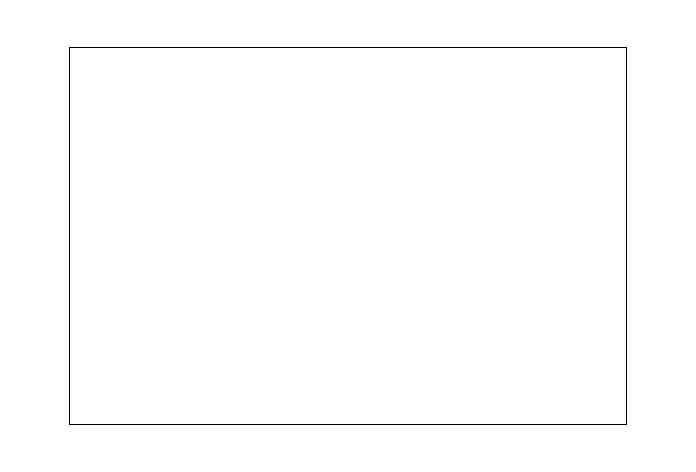

In [5]:
pmssm_plotter.impact1D(drawstring="g",analysis="combined")


# ["combined","cms_sus_18_004","cms_sus_21_007","atlas_susy_2018_32","atlas_susy_2018_06","cms_sus_21_006"]
for analysisName in ["combined"]:
    
    try:
        pmssm_plotter.impact1D(drawstring="g",analysis=analysisName)
    except:
        print("Impact 1D failed for analysis: ",analysisName)
    try:
        pmssm_plotter.survivalProbability2D(drawstring = "abs(chi10):g",analysis=analysisName)
    except:
        print("Survival Probability 2D failed for analysis: ",analysisName)
    try:        
        pmssm_plotter.survivalProbability2D(drawstring = "abs(chi10):g",analysis=analysisName,contourSwitch=True)
    except:
        print("Survival Probability 2D with contour failed for analysis: ",analysisName)
    try:
        pmssm_plotter.quantilePlots1D(drawstring="g",analysis=analysisName, quantiles = {
                                                                    "0.5": {"color":kBlack},
                                                                    "0.75": {"color":kOrange},
                                                                    "0.9": {"color":kRed,"linestyle": kDashed},
                                                                    "0.99": {"color":kMagenta,"linestyle": kDashed}})
    except:
        print("Quantile plots 1D failed for analysis: ",analysisName)
        
    try:
        pmssm_plotter.quantilePlots2D(drawstring="abs(chi10):g",analysis=analysisName, quantile = 0.5)
    except:
        print("Quantile plots 2D failed for analysis: ",analysisName)